C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_1520\4128646160.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


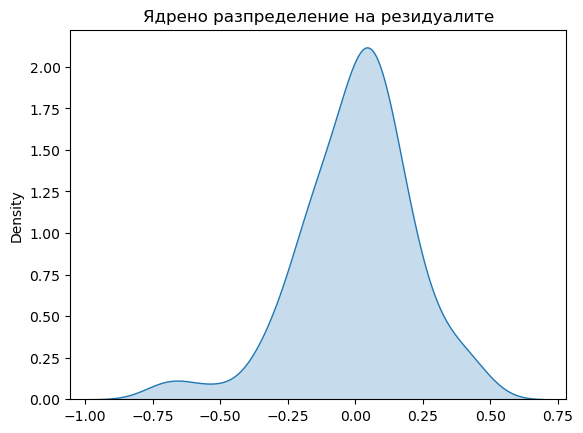

In [3]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Зареждане на данните
data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.01. Simple linear regression.csv')

# Определяне на зависимата и независимата променлива
X = data['SAT']
y = data['GPA']

# Добавяне на константа към независимата променлива
X = sm.add_constant(X)

# Създаване на модел на линейна регресия
model = sm.OLS(y,X)

# Построяване на модела на линейна регресия
results = model.fit()

# Изчисляване на резидуалите
residuals = results.resid

# Графично представяне на разпределението на резидуалите
sns.kdeplot(residuals, shade=True)
plt.title("Нормално разпределение на резидуалите")
plt.show()


Нормално разпределение на резидуалите спрямо нулата

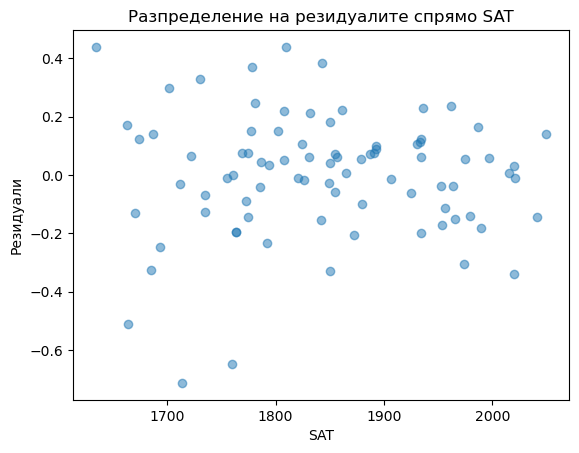

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Зареждане на данните
data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.01. Simple linear regression.csv')

# Определяне на зависимата и независимата променлива
X = data['SAT']
y = data['GPA']

# Добавяне на константа към независимата променлива
X = sm.add_constant(X)

# Създаване на модел на линейна регресия
model = sm.OLS(y,X)

# Построяване на модела на линейна регресия
results = model.fit()

# Изчисляване на резидуалите
residuals = results.resid

# Създаване на scatter plot за разпределението на резидуалите спрямо предиктора
plt.scatter(X['SAT'], residuals, alpha=0.5)

# Добавяне на заглавие на графиката
plt.title("Разпределение на резидуалите спрямо SAT")

# Добавяне на описание на оста x
plt.xlabel("SAT")

# Добавяне на описание на оста y
plt.ylabel("Резидуали")

# Показване на графиката
plt.show()


Търсим равномерно разпределение на резидуалите спрямо хоризонталнта ос, следователно е налице хомоскедастичност.
Иначе казано имаме равномерно разпределение на резидуалите спрямо всичко нива на предикторите. При хомоскедастичността разпределението на резидуалите е постоянно във всички стойности на предиктора, тоест няма систематично разместване на точките в едната или другата посока. В графиката, която предоставили, можем да видим, че разпределението на резидуалите не се размества систематично в едната или другата посока във всички стойности на предиктора (SAT), което може да бъде индикатор за хомоскедастичност. В случай на хомоскедастичност, разпределението на резидуалите ще бъде равномерно разпределено по цялата област на предиктора и няма да има никаква видима зависимост между разпределението на резидуалите и стойностите на предиктора. В случай на хетероскедастичност обаче, може да се наблюдава нарастване или намаляване на разброса на резидуалите по вертикала в зависимост от стойностите на предиктора.



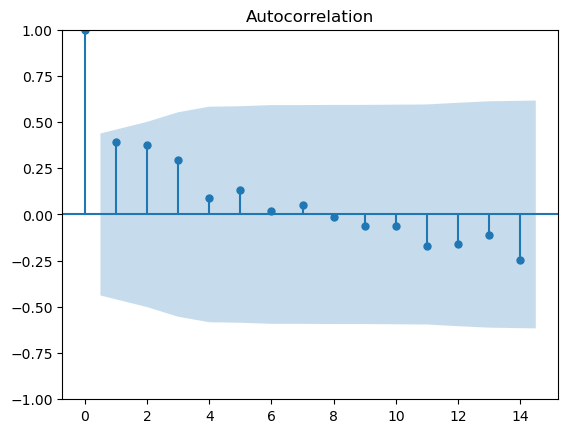

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Зареждане на данните
data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.01. Simple linear regression.csv')

# Определяне на зависимата и независимата променлива
X = data['SAT']
y = data['GPA']

# Добавяне на константа към независимата променлива
X = sm.add_constant(X)

# Създаване на модел на линейна регресия
model = sm.OLS(y,X)

# Построяване на модела на линейна регресия
results = model.fit()

# Изчисляване на резидуалите
residuals = results.resid

# Изчисляване на автокорелационната матрица
acf = sm.tsa.acf(residuals)

# Построяване на автокорелационната матрица
plot_acf(acf)
plt.show()


No autocorrelation (липса на автокорелация) е една от предпоставките, която трябва да бъде изпълнена при използването на някои статистически методи като линейна регресия.
Автокорелация означава наличието на корелация между резидуалите на модела на линейна регресия. Ако резидуалите на модела са корелирани помежду си, това може да доведе до неточности в оценките на коефициентите на модела и до неправилни статистически изводи.
Резултатът от този код ще бъде графика на автокорелационната матрица за резидуалите. Ако резидуалите са без автокорелация, очакваме да видим графика с променливи точки, които не преминават лентата на доверителност (пънктирната линия на графиката). Ако има автокорелация в резидуалите, очакваме да видим графика с точки, които пресичат или преминават лентата на доверителност.

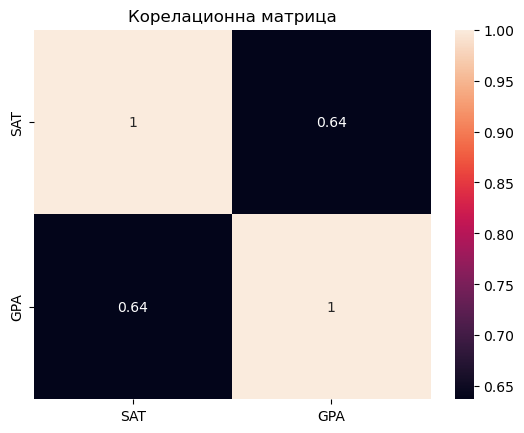

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Зареждане на данните
data = pd.read_csv('C:/Users/aleksandar.dimitrov/Desktop/Python Tests/1.01. Simple linear regression.csv')

# Генериране на корелационната матрица
corr_matrix = data.corr()

# Построяване на топлинна карта
sns.heatmap(corr_matrix, annot=True)
plt.title("Корелационна матрица")
plt.show()


Топлинната карта ще покаже стойностите на корелационната матрица в цветове, като по-силната корелация се изразява в по-силен цвят. Ако има някои независими променливи, които са силно корелирани помежду си (например, корелация над 0.7), то това може да покаже наличието на мултиколинеарност.